We have 3 "towers", Towers A to C. You have 3 discs on Tower A, Discs 1 to 3 with 1 the widest, followed by 2 and then 3.

Our goal is to move the discs from Tower A to Tower C with the following rules:
    - Only one disc can be moved at a time.
    - The top most disc of any tower is the only one available for moving.
    - A wider disc can never be on top of a narrower disc.
    
We can model the moving of disc with a data structure called stack. It is a data container that follows a Last-in-First-Out (LIFO) rule. To push is to add a new item to a stack and to pop is to remove and return the last item you added to the stack.

In [1]:
from typing import TypeVar, Generic, List

T = TypeVar('T')

class Stack(Generic[T]):
    
    def __init__(self) -> None:
        self._container: List[T] = []
    
    def push(self, item: T) -> None:
        self._container.append(item)
        
    def pop(self) -> None:
        # using the .pop() of a list
        return self._container.pop()
    
    def __repr__(self) -> str:
        return repr(self._container)

Defining our towers:

In [2]:
num_discs: int = 3

tower_a: Stack[int] = Stack()
tower_b: Stack[int] = Stack()
tower_c: Stack[int] = Stack()

for i in range(1, num_discs + 1):
    tower_a.push(i)

The solution is a recursion.
1. Move the upper n-1 discs from Tower A to B (the temporary tower), using C as the in-between.
2. Move the single lowest disc from A to C.
3. Move the n-1 discs from Tower B to C, using A as the in-between.

This recursive algorithm works for not only 3 discs but any number of discs.

In [3]:
def hanoi(begin: Stack[int], end: Stack[int], temp: Stack[int], n: int) -> None:
    if n == 1:
        end.push(begin.pop())
    else:
        hanoi(begin, temp, end, n - 1)
        hanoi(begin, end, temp, 1)
        hanoi(temp, end, begin, n - 1)

In [4]:
hanoi(tower_a, tower_c, tower_b, num_discs)
print(tower_a,"\n")
print(tower_b,"\n")
print(tower_c)

[] 

[] 

[1, 2, 3]


Note: As n (no. of discs) increases, the number of times the hanoi() function goes through itself recursively increases exponentially. For n discs, a total of 2^n - 1 moves/function calls are required.

Solution image from https://en.wikipedia.org/wiki/Tower_of_Hanoi#/media/File:Tower_of_Hanoi_recursion_SMIL.svg
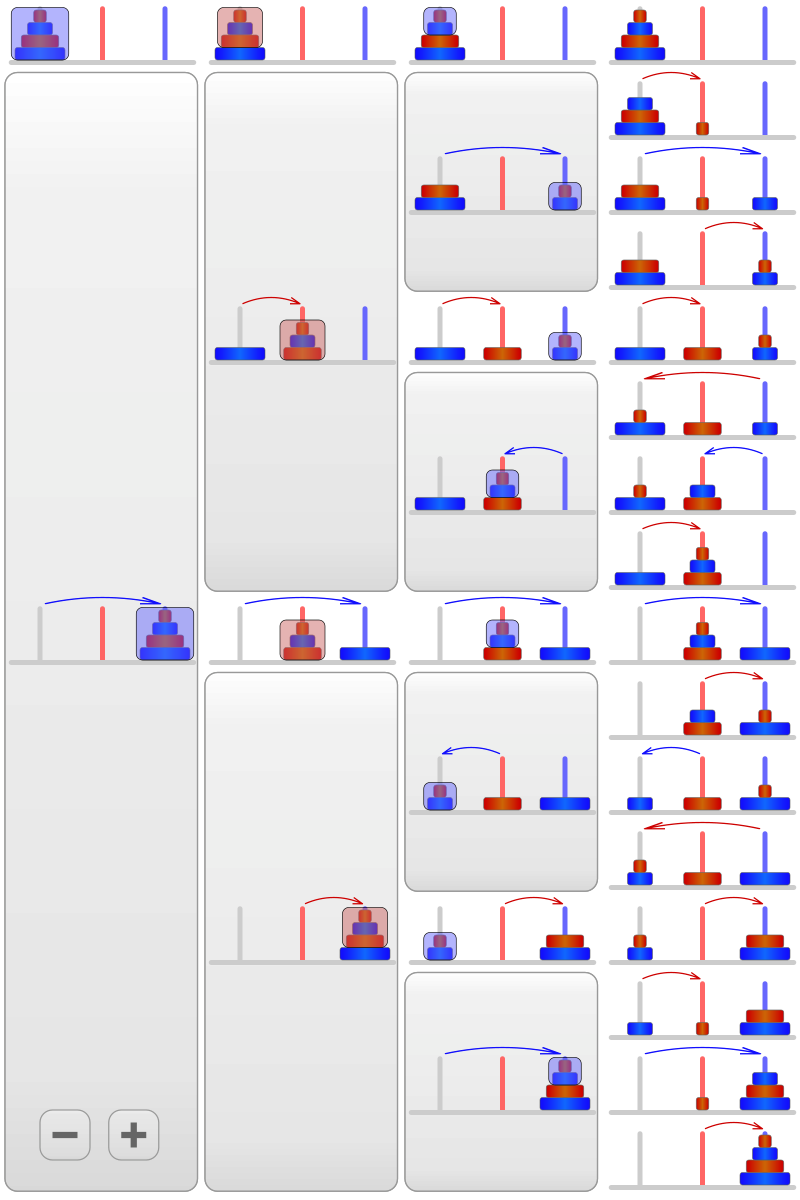